<img src='https://www.dropbox.com/s/125k1wnxkl6bgs0/class_logo.jpg?dl=1' alt="Smiley face" align="center" style="width: 600px;"/>


# Notebook 4




### Topics covered 
* * *
 * Portfolio math
 * Diversification
 * Capital allocation line
 * Mean-variance frontier
 * Tangency portfolio
 * Two-fund separation
 * Case study on international diversification

     

     

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
# url="C:/Users/Alan Moreira/Dropbox/Public/Fin418/Data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
df=Data[['RF','MKT']].copy()

# Case study on international portfolio diversification

In this section we will apply what we have learned so far on the international market. We will try to solve the optimal weights that give us the highest sharpe ratio, and how we should allocate our money between risk-free rate and risky asset to target on average return or volatility.

In [107]:
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,NaN
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [108]:
# for convenience lets rename these assets

Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data.tail()

,RF,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,,
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
2016-11-30,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
2016-12-31,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [109]:
# lets start by constructing a matrix with only excess returns
Re=(Data.drop('RF',axis=1)).subtract(Data['RF'],axis='index')
Re.tail()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676
2016-11-30,0.0486,-0.081736,-0.046071,-0.019898,-0.050459
2016-12-31,0.0182,-0.005596,0.002604,0.034083,-0.023507


In [110]:
# now we estimate the expected return and the covariance using the sample moments
ERe=Re.mean()
ERe

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64

In [111]:
Cove=Re.cov()
Cove

,MKTUS,BondUS,EM,MKTxUS,BondxUS
MKTUS,0.001948,0.000111,0.001292,0.001264,0.000187
BondUS,0.000111,0.001227,-0.000204,-0.000013,0.000264
EM,0.001292,-0.000204,0.003556,0.001661,0.000249
MKTxUS,0.001264,-0.000013,0.001661,0.002182,0.000422
BondxUS,0.000187,0.000264,0.000249,0.000422,0.000407


1. First we will solve for the maxium Sharpe ratio feasible: 

  - What is this? It is the SR on the tangency  portfolio

  - (I am using $W_*$ to denote it to make it easier to show the transposes)

  $\begin{align}
  SR(R^*)&=\frac{E[W_*'R^e]}{\sqrt{Var(W_*'R^e)}}\\
  &=\frac{W_*'E[R^e]}{\sqrt{W_*'Var(R^e)W_*}}\\
  &=\frac{(Var(R^e)^{-1}E[R^e])'E[R^e]}{\sqrt{(Var(R^e)^{-1}E[R^e])'Var(R^e)(Var(R^e)^{-1}E[R^e])}}\\
  &=\frac{E[R^e]'Var(R^e)^{-1}E[R^e]}{\sqrt{E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]}}\\
  &=\frac{E[R^e]'Var(R^e)^{-1}E[R^e]}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}\\
  &=\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}
  \end{align}$

2. Then we will solve for the weights that implement this Sharpe ratio

  $$W_*=VAR(R^e)^{-1}E[R^e]$$

3. And then we will solve for the position on it that implements a desired level of expected excess returns

In [112]:
ERe

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64

In [113]:
SR_int=(ERe @ np.linalg.inv(Cove) @ ERe)**0.5
SR_int

0.16368754895405602

In [114]:
# annualized

SR_int*12**0.5

0.5670303027096857

In [115]:
# compares with market

Re.MKTUS.mean()/Re.MKTUS.std()*12**0.5

0.40345097267659175

In [116]:
Wmve=pd.DataFrame([],index=Re.columns)
Wmve

""
MKTUS
BondUS
EM
MKTxUS
BondxUS


In [117]:
# construct the optimal weights

Wmve['wghts_int'] =np.linalg.inv(Cove) @ ERe.values

Wmve


,wghts_int
MKTUS,1.835334
BondUS,1.423373
EM,1.605223
MKTxUS,-1.026421
BondxUS,3.365823


### Class 11/17 stopped here

* To find the weights that implement a particular expected return target 

  $\begin{align}
  \mu^{target}&=r_f+(1-w_f)E[R^*] \\
  (1-w_f)&=\frac{\mu^{target}-r_f}{E[R^*]} \\
  &=\frac{\mu^{target}-r_f}{W_*'E[R^e]} \\
  &=\frac{\mu^{target}-r_f}{(VAR(R^e)^{-1}E[R^e])'E[R^e]} \\
  &=\frac{\mu^{target}-r_f}{E[R^e]'Var(R^e)^{-1}E[R^e]} \\
  \end{align}$

> How to choose $w_f$ by targeting a desired level of vol?

In [120]:
(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values)*12

0.3215233641910378

In [118]:
# target ER (excess return)

mu_target=0.10/12
oneminuswf=(mu_target/(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values))
print(oneminuswf)
# Here lamb is our 1-wf, which is the total dollar value invested in the risky portfolio

# must 
Wmve['wgths_int_target']=oneminuswf*(np.linalg.inv(Cove) @ ERe.values)
Wmve

0.3110193881293913


,wghts_int,wgths_int_target
MKTUS,1.835334,0.570824
BondUS,1.423373,0.442696
EM,1.605223,0.499255
MKTxUS,-1.026421,-0.319237
BondxUS,3.365823,1.046836


lets compute the domestic mean-variance frontier

(we only keep the first two columns MKT +Bonds)

In [121]:

ERdom=Re[['MKTUS','BondUS']].mean()
Covdom=Re[['MKTUS','BondUS']].cov()
SR_dom=(ERdom.values.T @ np.linalg.inv(Covdom) @ ERdom.values)**0.5
print(SR_dom*12**0.5)
Wmvedom= np.linalg.inv(Covdom) @ ERdom.values
Wmve.loc[['MKTUS','BondUS'],'wghts_dom']=Wmvedom
Wmve

0.46009875470841877


,wghts_int,wgths_int_target,wghts_dom
MKTUS,1.835334,0.570824,2.534954
BondUS,1.423373,0.442696,1.827591
EM,1.605223,0.499255,NaN
MKTxUS,-1.026421,-0.319237,NaN
BondxUS,3.365823,1.046836,NaN


### Aside: When is it ok to "normalize" weights?

* To get a bit of intuition we can normalize the weights to add up to 1

* Why these weights do not have to add up to 1?

* Why is ok to normalize to 1?

* What changes when we do that? What does not change?





In [122]:

Wmve/Wmve.sum()

,wghts_int,wgths_int_target,wghts_dom
MKTUS,0.254790,0.254790,0.581072
BondUS,0.197599,0.197599,0.418928
EM,0.222844,0.222844,NaN
MKTxUS,-0.142493,-0.142493,NaN
BondxUS,0.467259,0.467259,NaN


In [127]:
# this difference is the benefits of international diversification

(SR_int-SR_dom)*12**0.5

0.10693154800126692

- what does that mean?

- it means for example that if you want to target a portfolio with a volatility of 5% per month (about the vol of the US market portfolio), then you get  


In [132]:
SR_int_y=SR_int*12**0.5
SR_dom_y=SR_dom*12**0.5

In [134]:
SR_dom_y

0.46009875470841877

In [135]:
# international diversification
voltarget=0.1
[SR_int_y*voltarget,SR_dom_y*voltarget]


[0.05670303027096857, 0.04600987547084188]

In [136]:
# annualized  your returns increase by 
(SR_int_y*voltarget -SR_dom_y*voltarget)

0.01069315480012669

In [137]:
# in percentual increase it is very meaningful
(SR_int_y*voltarget -SR_dom_y*voltarget)/(SR_dom_y*voltarget)

0.23240999221793873

### The mean-variance frontier in it's full glory

In [138]:
mu_target=np.linspace(0,0.025,20)
mu_target*12

array([0.        , 0.01578947, 0.03157895, 0.04736842, 0.06315789,
       0.07894737, 0.09473684, 0.11052632, 0.12631579, 0.14210526,
       0.15789474, 0.17368421, 0.18947368, 0.20526316, 0.22105263,
       0.23684211, 0.25263158, 0.26842105, 0.28421053, 0.3       ])

In [142]:
STD_MVE_int=(Wmve['wghts_int'] @ Cove @ Wmve['wghts_int'].T)**0.5

ER_MVE_int=(Wmve['wghts_int'] @ Re.mean())
#   proportion of money investing in the international portfolio
#lam=mu_target/(SR_int**2)
lam=mu_target/(ER_MVE_int)
lam

array([0.        , 0.04910832, 0.09821665, 0.14732497, 0.1964333 ,
       0.24554162, 0.29464995, 0.34375827, 0.3928666 , 0.44197492,
       0.49108324, 0.54019157, 0.58929989, 0.63840822, 0.68751654,
       0.73662487, 0.78573319, 0.83484152, 0.88394984, 0.93305816])

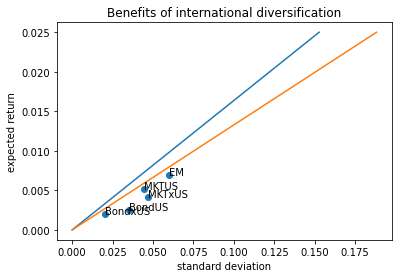

In [145]:
# Lets visualize this in a plot including the two investment frontiers

# set different expected return targets
mu_target=np.linspace(0,0.025,20)
# international portfolios
#   standard deviation of the international portfolio
STD_MVE_int=(Wmve['wghts_int'] @ Cove @ Wmve['wghts_int'].T)**0.5

ER_MVE_int=(Wmve['wghts_int'] @ Re.mean())
#   proportion of money investing in the international portfolio
lam=mu_target/(SR_int**2)
lam=mu_target/(ER_MVE_int)

#   standard deviation of the investment portfolio
STD_target_int=lam*STD_MVE_int

# do the plot
plt.plot(STD_target_int,mu_target)

#Domestic portfolios
STD_MVE_dom=(Wmve.loc[['MKTUS','BondUS'],'wghts_dom'] @ Covdom @ Wmve.loc[['MKTUS','BondUS'],'wghts_dom'].T)**0.5

STD_target_dom=mu_target/(SR_dom**2)*STD_MVE_dom
plt.plot(STD_target_dom,mu_target)
plt.scatter(Re.std(),Re.mean())

# lets add some labels so we know which point is each portfolio
# First time that I use loop? If yes discuss

for label in Re.columns :
   plt.text(Re.std()[label],Re.mean()[label],label)

plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Benefits of international diversification')
plt.show()

In [ ]:
# 